In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.feather as feather
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
ROOT_FOLDER = os.path.dirname(os.getcwd())
PROCESSED_DATA =  os.path.join(ROOT_FOLDER, "data","processed")

In [4]:
ICU_TAB_FEATURES = os.path.join(PROCESSED_DATA,"icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240518.feather")
ICU_TAB_FEATURE = os.path.join(PROCESSED_DATA,"icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240602.feather")
ICU_STAYS = os.path.join(PROCESSED_DATA,"icustays_20240602.feather")

In [5]:
df1 = feather.read_feather(ICU_STAYS )
df1.head()

,subject_id,hadm_id,icu_stay_id,first_careunit,icu_intime,icu_outtime,icu_los,hours_until_readmission,will_be_readmitted,hours_to_readmission,stay_is_readmission
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,NaN,False,NaN,False
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,NaN,False,NaN,False
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,665.573333,True,NaN,False
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,NaN,False,665.573333,True
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,NaN,False,NaN,False


In [6]:
df2 = feather.read_feather(ICU_TAB_FEATURES)
df2.head()

,hadm_id,subject_id,stay_id,Arterial Blood Pressure diastolic_max,Arterial Blood Pressure diastolic_mean,Arterial Blood Pressure diastolic_min,Arterial Blood Pressure diastolic_std,Arterial Blood Pressure mean_max,Arterial Blood Pressure mean_mean,Arterial Blood Pressure mean_min,...,pO2_median,pO2_min,pO2_std,urine_last_1d,anchor_age,is_planed,is_surg,aids,neoplasie,metastatic_cancer
0,23786647,10018328,31269608,58.0,53.818182,49.0,3.250175,89.0,81.909091,75.0,...,NaN,NaN,NaN,2130.0,83,False,True,None,None,None
1,24104168,10020187,37509585,75.0,62.888889,47.0,7.653441,103.0,85.222222,63.0,...,NaN,NaN,NaN,3380.0,63,False,True,None,None,None
2,26842957,10020187,32554129,74.0,58.250000,49.0,7.827303,101.0,80.062500,66.0,...,NaN,NaN,NaN,2150.0,63,False,True,None,None,None
3,27882036,10012853,31338022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.5,51.0,2.12132,1375.0,91,False,False,None,None,None
4,25826145,10020740,32145159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2240.0,56,False,True,None,None,None


In [7]:
df3 = feather.read_feather(ICU_TAB_FEATURE)
df3.head()

,hadm_id,subject_id,stay_id,Arterial Blood Pressure diastolic_max,Arterial Blood Pressure diastolic_mean,Arterial Blood Pressure diastolic_min,Arterial Blood Pressure diastolic_std,Arterial Blood Pressure mean_max,Arterial Blood Pressure mean_mean,Arterial Blood Pressure mean_min,...,pO2_median,pO2_min,pO2_std,urine_last_1d,anchor_age,is_planed,is_surg,aids,neoplasie,metastatic_cancer
0,29079034,10000032,39553978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,175.0,52.0,False,False,None,None,None
1,26913865,10000980,39765666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,False,False,None,None,None
2,24597018,10001217,37067082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2645.0,55.0,False,True,None,None,None
3,27703517,10001217,34592300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2475.0,55.0,False,True,None,None,None
4,25563031,10001725,31205490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1965.0,46.0,False,False,None,None,None


In [8]:
merged_df = pd.merge(df1, df2, on='subject_id')
merged_df.head()
#merged_df[['subject_id','hours_until_readmission', 'icu_stay_id','stay_id','icu_intime','icu_outtime']].head(20)

,subject_id,hadm_id_x,icu_stay_id,first_careunit,icu_intime,icu_outtime,icu_los,hours_until_readmission,will_be_readmitted,hours_to_readmission,...,pO2_median,pO2_min,pO2_std,urine_last_1d,anchor_age,is_planed,is_surg,aids,neoplasie,metastatic_cancer
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,NaN,False,NaN,...,NaN,NaN,NaN,175.0,52,False,False,None,None,None
1,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,665.573333,True,NaN,...,NaN,NaN,NaN,2645.0,55,False,True,None,None,None
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,665.573333,True,NaN,...,NaN,NaN,NaN,2475.0,55,False,True,None,None,None
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,NaN,False,665.573333,...,NaN,NaN,NaN,2645.0,55,False,True,None,None,None
4,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,NaN,False,665.573333,...,NaN,NaN,NaN,2475.0,55,False,True,None,None,None


In [9]:
# Find duplicates based on 'subject_id' and 'icu_stay_id', 'icu_intime' , 'icu_outtime'
duplicates = merged_df[merged_df.duplicated(subset=['subject_id', 'icu_stay_id','icu_intime','icu_outtime'], keep=False)]
#print(duplicates)

In [10]:
# Remove duplicates, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset=['subject_id', 'icu_stay_id', 'icu_intime','icu_outtime'], keep='first')
#merged_df.head()
merged_df[['subject_id','hours_until_readmission','hours_to_readmission','stay_is_readmission','will_be_readmitted', 'icu_stay_id','stay_id','icu_intime','icu_outtime']].head(20)

,subject_id,hours_until_readmission,hours_to_readmission,stay_is_readmission,will_be_readmitted,icu_stay_id,stay_id,icu_intime,icu_outtime
0,10000032,NaN,NaN,False,False,39553978,39553978,2180-07-23 14:00:00,2180-07-23 23:50:47
1,10001217,665.573333,NaN,False,True,37067082,37067082,2157-11-20 19:18:02,2157-11-21 22:08:00
3,10001217,NaN,665.573333,True,False,34592300,37067082,2157-12-19 15:42:24,2157-12-20 14:27:41
5,10001725,NaN,NaN,False,False,31205490,31205490,2110-04-11 15:52:22,2110-04-12 23:59:56
6,10002428,208.370556,98.905278,True,True,34807493,34807493,2156-04-30 21:53:00,2156-05-02 22:27:20
10,10002428,NaN,208.370556,True,False,35479615,34807493,2156-05-11 14:49:34,2156-05-22 14:16:46
14,10002428,50.236389,NaN,False,True,33987268,34807493,2156-04-12 16:24:18,2156-04-17 15:57:08
18,10002428,98.905278,50.236389,True,True,38875437,34807493,2156-04-19 18:11:19,2156-04-26 18:58:41
22,10002495,NaN,NaN,False,False,36753294,36753294,2141-05-22 20:18:01,2141-05-27 22:24:02
23,10002930,NaN,NaN,False,False,37049133,37049133,2196-04-14 13:40:00,2196-04-15 16:54:44


In [11]:
# Create 'readmitted' column based on 'hours_until_readmission'
merged_df['readmitted'] = merged_df['hours_until_readmission'].apply(lambda x: 1 if x <= 720 else 0)
merged_df['readmitted'] = merged_df['readmitted'].fillna(0).astype(int)
print(merged_df[['subject_id','icu_stay_id','hours_until_readmission', 'readmitted']].head(10))

    subject_id icu_stay_id  hours_until_readmission  readmitted
0     10000032    39553978                      NaN           0
1     10001217    37067082               665.573333           1
3     10001217    34592300                      NaN           0
5     10001725    31205490                      NaN           0
6     10002428    34807493               208.370556           1
10    10002428    35479615                      NaN           0
14    10002428    33987268                50.236389           1
18    10002428    38875437                98.905278           1
22    10002495    36753294                      NaN           0
23    10002930    37049133                      NaN           0


In [12]:
nan_columns = merged_df.isnull().sum()
nan_columns = nan_columns[nan_columns > 0]
print("Columns with NaN values and their counts:\n", nan_columns)

Columns with NaN values and their counts:
 hours_until_readmission                   111
hours_to_readmission                      111
Arterial Blood Pressure diastolic_max      82
Arterial Blood Pressure diastolic_mean     82
Arterial Blood Pressure diastolic_min      82
                                         ... 
pO2_min                                    61
pO2_std                                    82
aids                                      131
neoplasie                                 131
metastatic_cancer                         131
Length: 325, dtype: int64


In [13]:
# Calculate the percentage of NaN values for each column
nan_percentage = merged_df.isnull().mean()

# Set a threshold, for example, 90%
threshold = 0.90

# Identify columns to drop
columns_to_drop = nan_percentage[nan_percentage > threshold].index

# Drop these columns from the dataset
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

# Display the columns that were removed
removed_columns = columns_to_drop.tolist()
print("Removed columns:", removed_columns)
print(merged_df_cleaned.info())


Removed columns: ['Tidal Volume (spontaneous)_std', 'daily bmi', 'aids', 'neoplasie', 'metastatic_cancer']
<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 229
Columns: 391 entries, subject_id to readmitted
dtypes: bool(4), category(1), datetime64[ns](2), float64(345), int64(38), object(1)
memory usage: 397.1+ KB
None


In [14]:
nan_columns = merged_df_cleaned.isnull().sum()
nan_columns = nan_columns[nan_columns > 0]
print("Columns with NaN values and their counts:\n", nan_columns)

Columns with NaN values and their counts:
 hours_until_readmission                   111
hours_to_readmission                      111
Arterial Blood Pressure diastolic_max      82
Arterial Blood Pressure diastolic_mean     82
Arterial Blood Pressure diastolic_min      82
                                         ... 
pH_std                                     70
pO2_max                                    61
pO2_median                                 61
pO2_min                                    61
pO2_std                                    82
Length: 320, dtype: int64


In [15]:
# Fill missing values with the mean or "unknown" value
for column in nan_columns.index:
    if merged_df_cleaned[column].dtype == 'float64' or merged_df_cleaned[column].dtype == 'int64':
        # Fill numerical columns with the mean
        merged_df_cleaned[column] = merged_df_cleaned[column].fillna(merged_df_cleaned[column].mean())
    else:
        # Fill categorical columns with "unknown" value
        merged_df_cleaned[column] = merged_df_cleaned[column].fillna('unknown')

# Check for missing values after filling
nan_columns_after = merged_df_cleaned.isnull().sum()
nan_columns_after = nan_columns_after[nan_columns_after > 0]
print("Columns with NaN values after filling:\n", nan_columns_after)

Columns with NaN values after filling:
 Series([], dtype: int64)


In [16]:
# Separate numeric and non-numeric columns
numeric_columns = merged_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = merged_df_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the mean
merged_df_cleaned[numeric_columns] = merged_df_cleaned[numeric_columns].fillna(merged_df_cleaned[numeric_columns].mean())

# For categorical columns, first add 'unknown' as a category and then fill NaNs
for column in non_numeric_columns:
    if merged_df_cleaned[column].dtype.name == 'category':
        merged_df_cleaned[column] = merged_df_cleaned[column].cat.add_categories('unknown')
    merged_df_cleaned[column] = merged_df_cleaned[column].fillna('unknown')

# Check again for any remaining missing values
nan_columns_after = merged_df_cleaned.isnull().sum()
nan_columns_after = nan_columns_after[nan_columns_after > 0]
print("Columns with NaN values after filling:\n", nan_columns_after)
print(merged_df_cleaned.shape)


Columns with NaN values after filling:
 Series([], dtype: int64)
(131, 391)


Top features based on combined methods:
2                                    icu_los
1                                  hadm_id_x
136                     Respiratory Rate_std
303                         Magnesium_median
293                                 MCHC_std
246                           Creatinine_max
134                    Respiratory Rate_mean
290                                 MCHC_max
332                            Potassium_min
322                       Platelet Count_max
25      Non Invasive Blood Pressure mean_max
323                    Platelet Count_median
255                           Glucose_median
302                            Magnesium_max
247                        Creatinine_median
256                              Glucose_min
202                       Strength R Leg_max
362                    White Blood Cells_max
26     Non Invasive Blood Pressure mean_mean
270                           Hemoglobin_max
266                           Hematocrit_max
254            

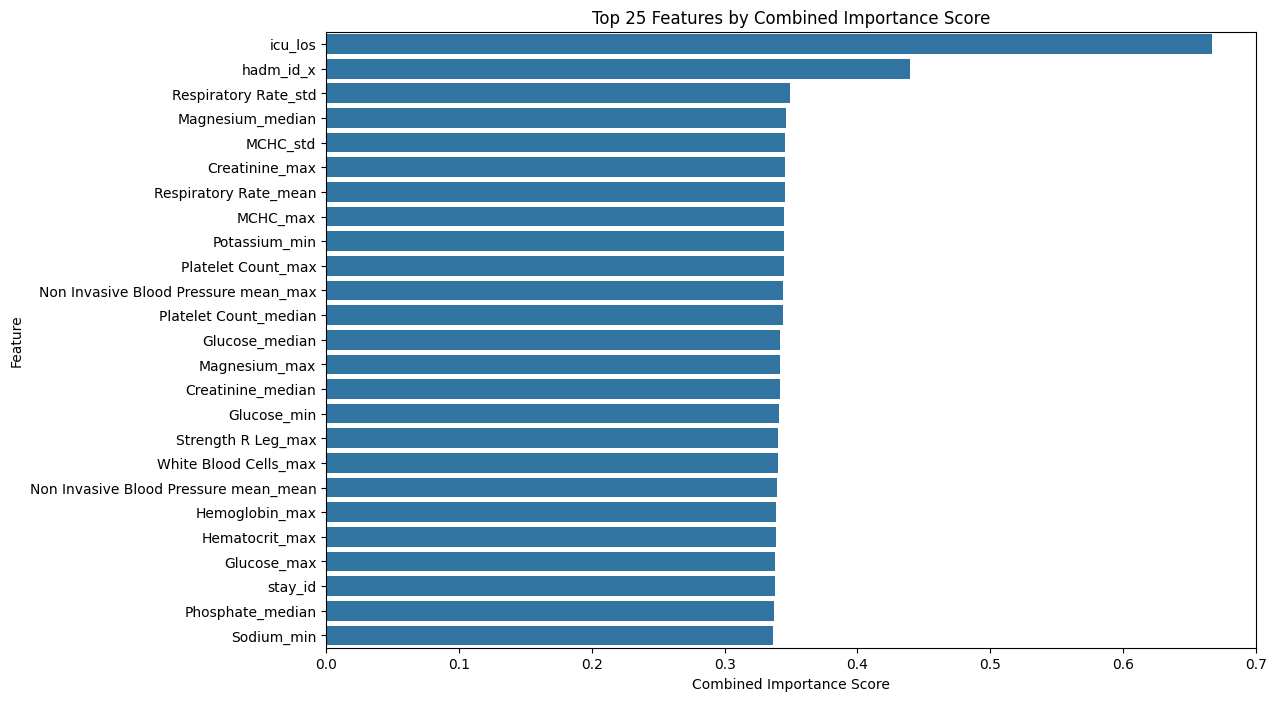

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target variable
X = merged_df_cleaned.drop(['readmitted', 'hours_until_readmission','hours_to_readmission'], axis=1)
y = merged_df_cleaned['readmitted']

# Select only numeric columns for model training
numeric_X = X.select_dtypes(include=['float64', 'int64'])

# RandomForest Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(numeric_X, y)
rf_importances = rf_model.feature_importances_

# RFE
rfe = RFE(estimator=rf_model, n_features_to_select=25, step=1)
rfe.fit(numeric_X, y)
rfe_ranking = rfe.ranking_

# Lasso
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(numeric_X, y)
lasso_coef = np.abs(lasso.coef_)

# Create a DataFrame for all feature scores
features = numeric_X.columns
scores_df = pd.DataFrame({
    'Feature': features,
    'RandomForest': rf_importances,
    'RFE': 1 / rfe_ranking,  # Inverse ranking, lower rank gets higher importance
    'Lasso': lasso_coef
})

# Normalize the scores
scores_df['RandomForest'] = scores_df['RandomForest'] / scores_df['RandomForest'].max()
scores_df['RFE'] = scores_df['RFE'] / scores_df['RFE'].max()
scores_df['Lasso'] = scores_df['Lasso'] / scores_df['Lasso'].max()

# Aggregate the normalized scores
scores_df['CombinedScore'] = scores_df[['RandomForest', 'RFE', 'Lasso']].mean(axis=1)

# Sort by the combined score
scores_df = scores_df.sort_values(by='CombinedScore', ascending=False)

# Select top features
top_features_combined = scores_df.head(25)['Feature']

print("Top features based on combined methods:")
print(top_features_combined)

# Plotting the combined feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='CombinedScore', y='Feature', data=scores_df.head(25))
plt.title('Top 25 Features by Combined Importance Score')
plt.xlabel('Combined Importance Score')
plt.ylabel('Feature')
plt.show()



              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.50      0.33      0.40         3

    accuracy                           0.89        27
   macro avg       0.71      0.65      0.67        27
weighted avg       0.87      0.89      0.88        27

[[23  1]
 [ 2  1]]
ROC AUC Score: 0.7708333333333333


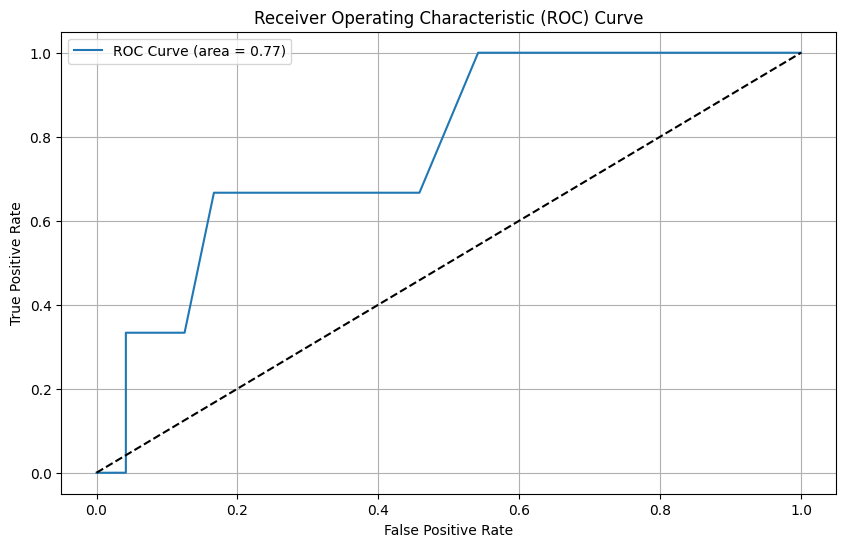

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the important features
important_features = [
    "icu_los",
    "Respiratory Rate_std",
    "Magnesium_median",
    "MCHC_std",
    "Creatinine_max",
    "Respiratory Rate_mean",
    "MCHC_max",
    "Potassium_min",
    "Platelet Count_max",
    "Non Invasive Blood Pressure mean_max",
    "Platelet Count_median",
    "Glucose_median",
    "Magnesium_max",
    "Creatinine_median",
    "Glucose_min",
    "Strength R Leg_max",
    "White Blood Cells_max",
    "Non Invasive Blood Pressure mean_mean",
    "Hemoglobin_max",
    "Hematocrit_max",
    "Glucose_max",
    "Phosphate_median",
    "Sodium_min"
]

# Filter the dataset to only include these important features
X_important_features = merged_df_cleaned[important_features]

# Define target variable
y = merged_df_cleaned['readmitted']

# Handle any remaining missing values by filling with mean (or appropriate method)
X_important_features = X_important_features.fillna(X_important_features.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important_features, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': X_important_features.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


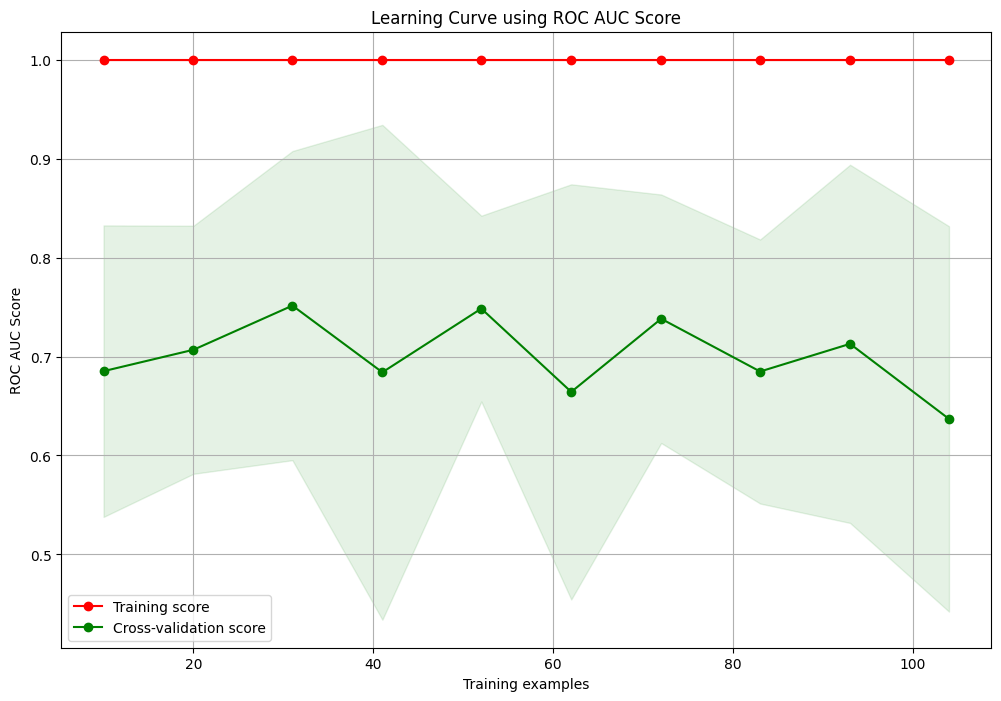

In [19]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, make_scorer

# Filter the dataset to only include these important features
X_important_features = merged_df_cleaned[important_features]

# Define target variable
y = merged_df_cleaned['readmitted']

# Handle any remaining missing values by filling with mean (or appropriate method)
X_important_features = X_important_features.fillna(X_important_features.mean())

# Define the custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Calculate the learning curve using ROC AUC score
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42), 
    X_important_features, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring=roc_auc_scorer, random_state=42)

# Calculate the mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve using ROC AUC Score')
plt.xlabel('Training examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.80      0.89        20

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.91        45
weighted avg       0.92      0.91      0.91        45

[[25  0]
 [ 4 16]]
ROC AUC Score: 0.963


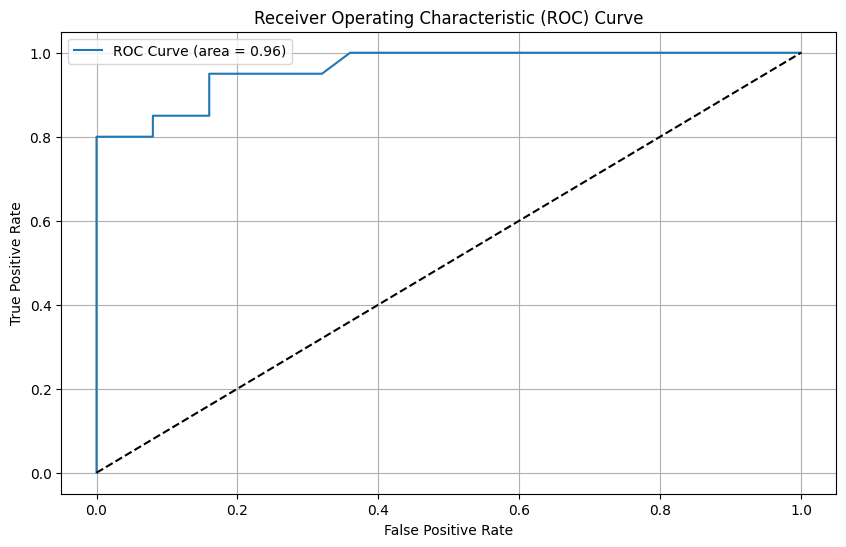

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the dataset to only include these important features
X_important_features = merged_df_cleaned[important_features]

# Define target variable
y = merged_df_cleaned['readmitted']

# Handle any remaining missing values by filling with mean (or appropriate method)
X_important_features = X_important_features.fillna(X_important_features.mean())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_important_features, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': X_important_features.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
#plt.figure(figsize=(12, 8))
#sns.barplot(x='Importance', y='Feature', data=features_df)
#plt.title('Feature Importances')
#plt.show()

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


